# **Proyek Pertama : Predictive Analytics**


Panduan Project : [Dicoding](https://www.dicoding.com/academies/319/tutorials/17052)

Predicted Number of Bikes Rented :
- Proyek ini menghasilkan model yang dapat memprediksi berapa jumlah keselurahan sepeda yang akan dipinjam dalam satu hari (*Kasus Regresi*).
- Model ini bekerja melalui banyak prediktor yang berpengaruh seperti terkait tanggal, cuaca, kelembaban dan masih banyak lagi.

- Dataset yang digunakan dalam model ini berasal dari ==> [Bike Rents for the Day (Regression)](https://www.kaggle.com/datasets/ayessa/bike-sharing-dataset-regression)

- Proyek ini dikerjakan dalam rangka menyelesaikan kelas [Machine Learning Terapan](https://www.dicoding.com/academies/319)

Nama : Toni Andreas Susanto

Asal : Kota Samarinda, Provinsi Kalimantan Timur



# Libraries

In [1]:
import zipfile,os
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Data Loading

In [2]:
bike = pd.read_csv("/content/day.csv")
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


# Exploratory Data Analysis

## 1. Deskripsi Variabel

- `instant`: indeks record
- `dteday` : tanggal
- `season`: musim (1:musim dingin, 2:musim semi, 3:musim panas, 4:musim gugur)
- `yr`: tahun (0: 2011, 1:2012)
- `mnth`: bulan (1 sampai 12)
- `holiday`: hari cuaca adalah hari libur atau tidak (disarikan dari [Web Link])
- `weekday`: hari dalam seminggu
- `workingday`: jika hari bukan akhir pekan atau hari libur adalah 1, jika tidak adalah 0.
- `weathersit`:
  * 1: Cerah, Sedikit awan, Sebagian berawan, Sebagian berawan
  * 2: Kabut + Mendung, Kabut + Awan Rusak, Kabut + Sedikit Awan, Kabut
  * 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar

- `temp`: Suhu normal dalam Celcius. Nilai diturunkan melalui (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (hanya dalam skala per jam)
- `atemp`: Suhu perasaan yang dinormalisasi dalam Celcius. Nilai diturunkan melalui (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (hanya dalam skala per jam)
- `hum`: Kelembaban normal. Nilai dibagi menjadi 100 (maks)
kecepatan angin: Kecepatan angin yang dinormalisasi. Nilai dibagi menjadi 67 (maks)
- `casual`: jumlah pengguna biasa
- `registered`: jumlah pengguna terdaftar
- `cnt`: jumlah total sewa sepeda termasuk sepeda santai dan terdaftar

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


## 2. Menyesuaikan Tipe Data

In [5]:
bike['dteday']=bike['dteday'].astype('datetime64')
bike['day'] = bike['dteday'].dt.day

# Categorical
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

bike[categorical_features] = bike[categorical_features].astype('object')

# Numeric
numerical_features = ['instant', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day']

bike.drop(['dteday', 'casual', 'registered'], inplace=True, axis = 1)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   season      731 non-null    object 
 2   yr          731 non-null    object 
 3   mnth        731 non-null    object 
 4   holiday     731 non-null    object 
 5   weekday     731 non-null    object 
 6   workingday  731 non-null    object 
 7   weathersit  731 non-null    object 
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  cnt         731 non-null    int64  
 13  day         731 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 80.1+ KB


> Terlihat kita memiliki 731 baris dan 14 kolom. Yang mana terdiri 4 bertipe `float64(4)`, 3 `int64` dan 7 `object`

## 3. Mengecek Missing Value

In [7]:
bike.isnull().sum()

instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
day           0
dtype: int64

> Tidak terdapat nilai yang kosong (*missing value*) sehingga kita dapat ke tahap selanjutnya.

## 4. Mengecek Ringkasan Data

In [8]:
bike.describe()

,instant,temp,atemp,hum,windspeed,cnt,day
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,4504.348837,15.738714
std,211.165812,0.183051,0.162961,0.142429,0.077498,1937.211452,8.809949
min,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000,1.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,3152.000000,8.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,4548.000000,16.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,5956.000000,23.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,8714.000000,31.000000


> Terlihat data kita memiliki rentang nilai yang beragam dan sepertinya terdapat outlier yang akan kita periksa pada tahap selanjutnya.

## 5. Mengecek dan Menangani Outliers

Mengecek outlier dengan boxplot

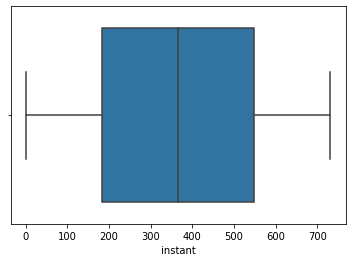

In [9]:
# 1. instant
sns.boxplot(x = bike['instant'])

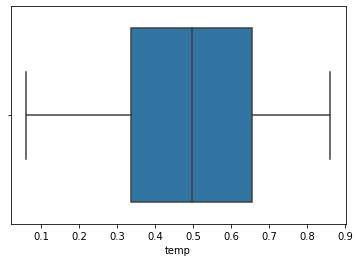

In [10]:
# 2. temp
sns.boxplot(x = bike['temp'])

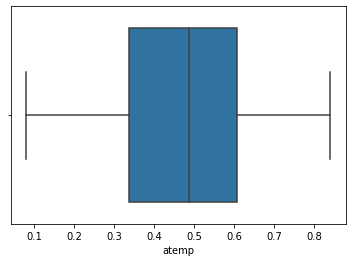

In [11]:
# 3. atemp
sns.boxplot(x = bike['atemp'])

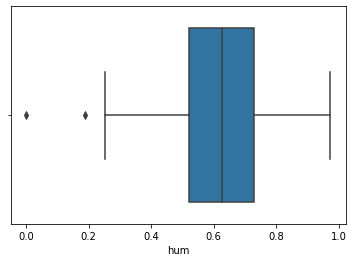

In [12]:
# 4. hum
sns.boxplot(x = bike['hum'])

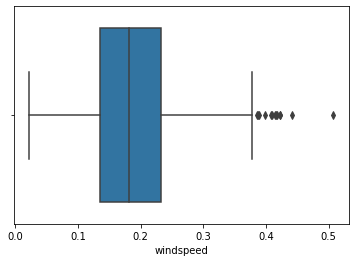

In [13]:
# 5. windspeed
sns.boxplot(x = bike['windspeed'])

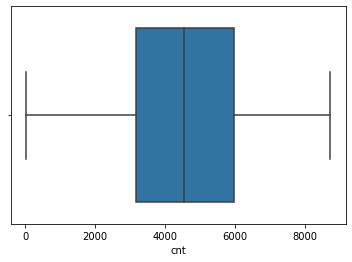

In [14]:
# 6. cnt
sns.boxplot(x = bike['cnt'])

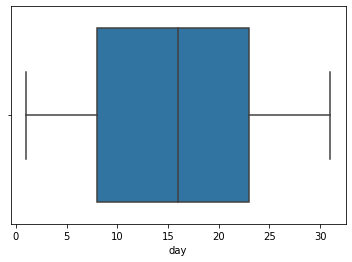

In [15]:
# 7. day
sns.boxplot(x = bike['day'])

> Terlihat pada beberapa kolom yaitu `hum` dan `windspeed` terdapat nilai outlier sehingga kita perlu membuang nilai tersebut.

In [16]:
# Cleansing Outlier
Q1 = bike.quantile(0.25)
Q3 = bike.quantile(0.75)

IQR = Q3 - Q1

bike_clean = bike[~((bike<(Q1-1.5*IQR)) | (bike>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
bike_clean.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys


(717, 14)

> Setelah membuang nilai outlier data kita berubah dari 731 baris dan 14 kolom menjadi 717 baris dan 14 kolom.

## 6. Exploratory Data Analysis - Univariate Analysis

### Categorical Features

   jumlah sampel  persentase
3            188        26.2
2            181        25.2
4            176        24.5
1            172        24.0


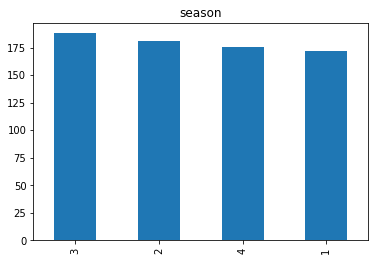

In [17]:
# Fitur season
feature = categorical_features[0]
count = bike_clean[feature].value_counts()
percent = 100*bike_clean[feature].value_counts(normalize=True)

df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df)
count.plot(kind = 'bar', title = feature)

Terdapat 4 kategori pada fitur `season`, secara berurutan dari jumlahnya yang paling banyak yaitu: 

- 3:musim panas
- 2:musim semi
- 4:musim gugur
- 1:musim dingin

> Dapat disimpulkan secara perbandingan proporsi setiap kategori cukup seimbang.

   jumlah sampel  persentase
0            359        50.1
1            358        49.9


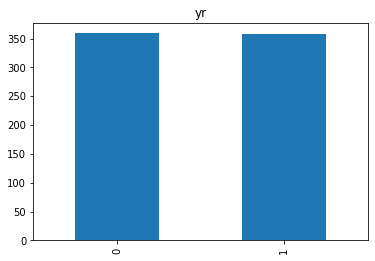

In [18]:
# Fitur year
feature = categorical_features[1]
count = bike_clean[feature].value_counts()
percent = 100*bike_clean[feature].value_counts(normalize=True)

df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df)
count.plot(kind = 'bar', title = feature)

Terdapat 2 kategori pada fitur `yr`, secara berurutan dari jumlahnya yang paling banyak yaitu: 
- 0 (tahun 2011)
- 1 (tahun 2012)

> Dapat disimpulkan secara perbandingan proporsi setiap kategori cukup seimbang.

    jumlah sampel  persentase
5              62         8.6
7              62         8.6
8              62         8.6
1              61         8.5
12             61         8.5
6              60         8.4
9              60         8.4
10             60         8.4
11             60         8.4
3              58         8.1
4              58         8.1
2              53         7.4


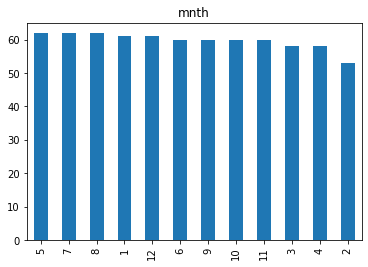

In [19]:
# Fitur month
feature = categorical_features[2]
count = bike_clean[feature].value_counts()
percent = 100*bike_clean[feature].value_counts(normalize=True)

df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df)
count.plot(kind = 'bar', title = feature)

Terdapat 12 kategori pada fitur `mnth`, secara berurutan dari jumlahnya yang paling banyak yaitu: 
- 5, 7, 8, 1, 12 dst

> Dapat disimpulkan secara perbandingan proporsi setiap kategori cukup seimbang. Dan nilai yang terbesar pada bulan 5 dan terkecil pada bulan 2.

   jumlah sampel  persentase
0            696        97.1
1             21         2.9


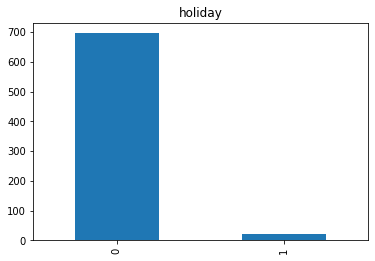

In [20]:
# Fitur holiday
feature = categorical_features[3]
count = bike_clean[feature].value_counts()
percent = 100*bike_clean[feature].value_counts(normalize=True)

df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df)
count.plot(kind = 'bar', title = feature)

Terdapat 2 kategori pada fitur `holiday`, secara berurutan dari jumlahnya yang paling banyak yaitu: 
- 0 (Tidak Libur)
- 1 (Libur)

> Dapat disimpulkan secara perbandingan proporsi cenderung nilai 0 lebih besar dari 1.

   jumlah sampel  persentase
0            103        14.4
2            103        14.4
3            103        14.4
5            103        14.4
6            102        14.2
1            102        14.2
4            101        14.1


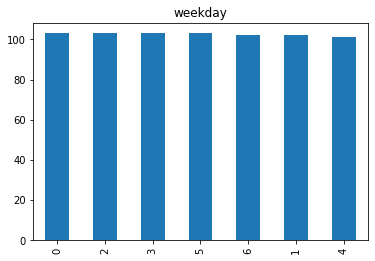

In [21]:
# Fitur weekday
feature = categorical_features[4]
count = bike_clean[feature].value_counts()
percent = 100*bike_clean[feature].value_counts(normalize=True)

df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df)
count.plot(kind = 'bar', title = feature)

Terdapat 7 kategori pada fitur `yr`, secara berurutan dari jumlahnya yang paling banyak yaitu: 
- 0 (minggu)
- 2 (selasa)
- 3 (rabu)
- 5 (jumat)
- 6 (sabtu)
- 1 (senin)
- 4 (kamis)

> Dapat disimpulkan secara perbandingan proporsi setiap kategori cukup seimbang.

   jumlah sampel  persentase
1            491        68.5
0            226        31.5


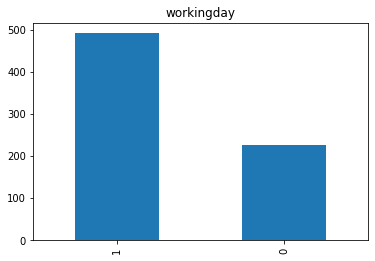

In [22]:
# Fitur workingday
feature = categorical_features[5]
count = bike_clean[feature].value_counts()
percent = 100*bike_clean[feature].value_counts(normalize=True)

df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df)
count.plot(kind = 'bar', title = feature)

Terdapat 2 kategori pada fitur `workingday`, secara berurutan dari jumlahnya yang paling banyak yaitu: 

- 1 (Bukan Akhir Pekan / Hari Libur)
- 0 (Akhir Pekan / Hari Libur)

> Dapat disimpulkan secara perbandingan proporsi cenderung bukan akhir pekan (kategori 1).

   jumlah sampel  persentase
1            453        63.2
2            244        34.0
3             20         2.8


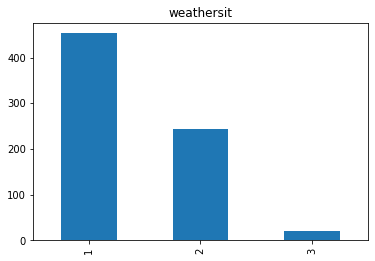

In [23]:
# Fitur weathersit
feature = categorical_features[6]
count = bike_clean[feature].value_counts()
percent = 100*bike_clean[feature].value_counts(normalize=True)

df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df)
count.plot(kind = 'bar', title = feature)

Terdapat 3 kategori pada fitur `weathersit`, secara berurutan dari jumlahnya yang paling banyak yaitu: 

- 1: Cerah, Sedikit awan, Sebagian berawan, Sebagian berawan
- 2: Kabut + Mendung, Kabut + Awan Rusak, Kabut + Sedikit Awan, Kabut
- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar

> Dapat disimpulkan secara perbandingan proporsi lebih serin Cerah (Kategori 1).

### Numerical Features

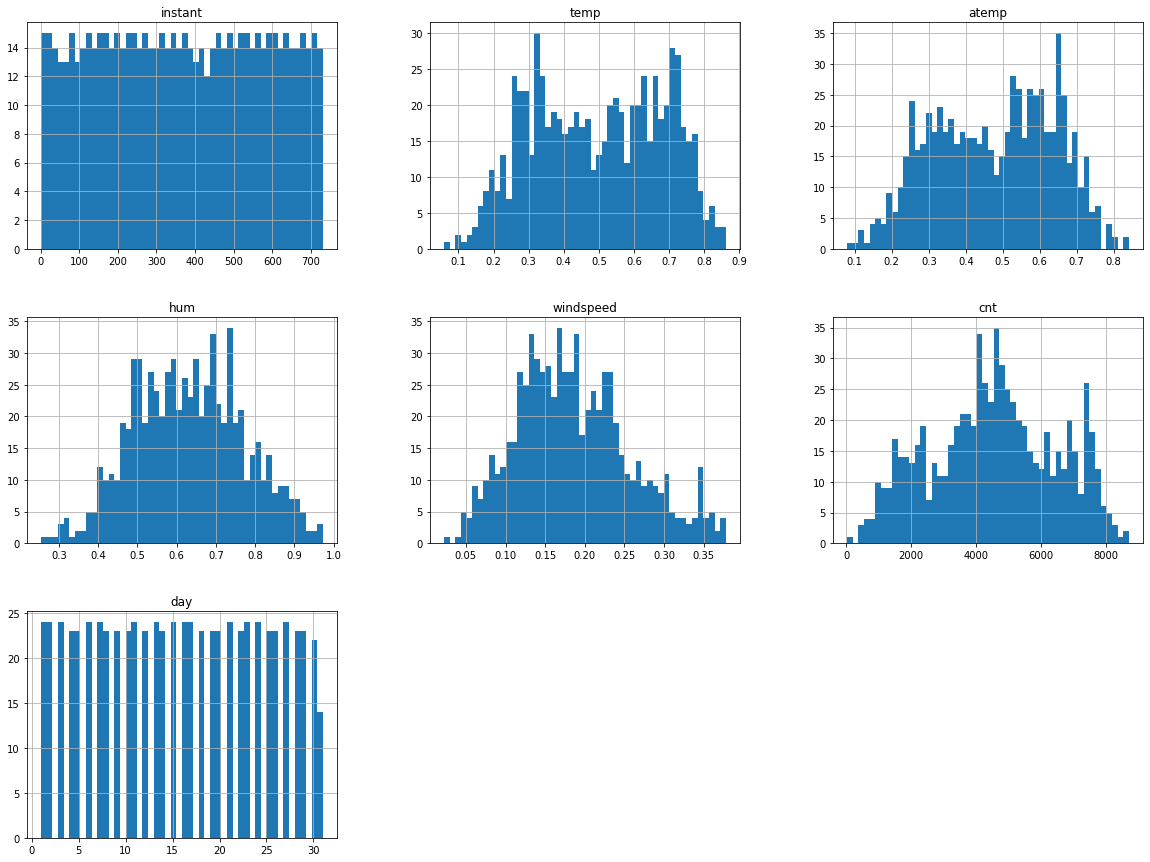

In [24]:
bike_clean[numerical_features].hist(bins = 50, figsize = (20,15))
plt.show()

Mari amati histogram di atas, khususnya histogram untuk variabel "cnt" yang merupakan fitur target (label) pada data kita. Dari histogram "cnt", kita bisa memperoleh beberapa informasi, antara lain:

- Peningkatan jumlah sewa sepeda cenderung menyebar cukup merata tinggi di tengah (mean) atau mediannya. Awalnya sedikit kemudian naik hingga titik tertentu dan menurun.
- Rentang jumlah sepeda yang disewa cenderung cukup tinggi yaitu dari skala 22 hingga 8714 unit.

## 7. Exploratory Data Analysis - Multivariate Analysis

Multivariate EDA menunjukkan hubungan antara dua atau lebih variabel pada data. Multivariate EDA yang menunjukkan hubungan antara dua variabel biasa disebut sebagai bivariate EDA.

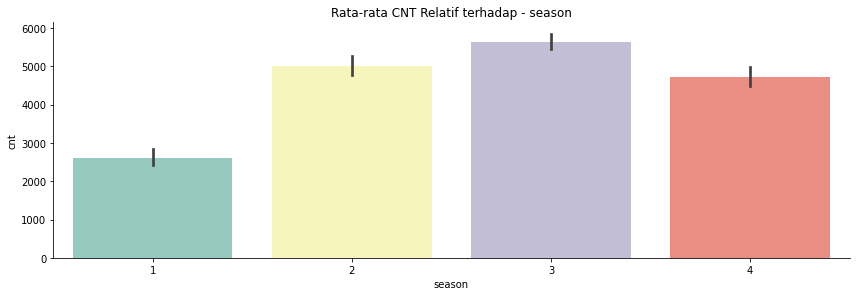

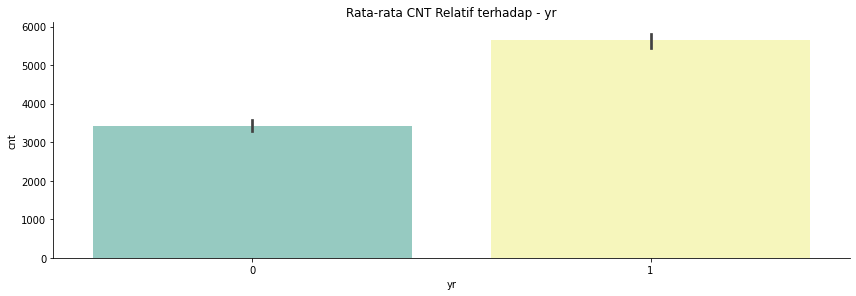

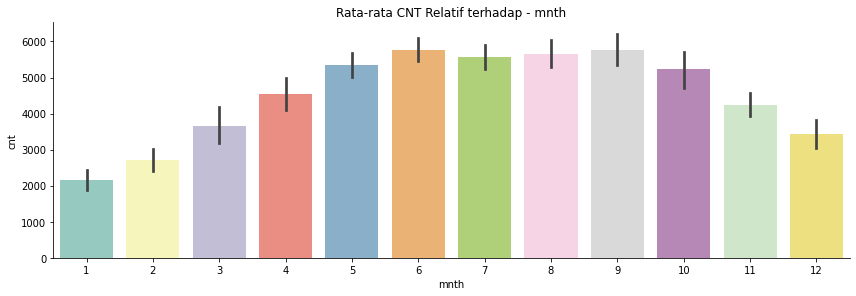

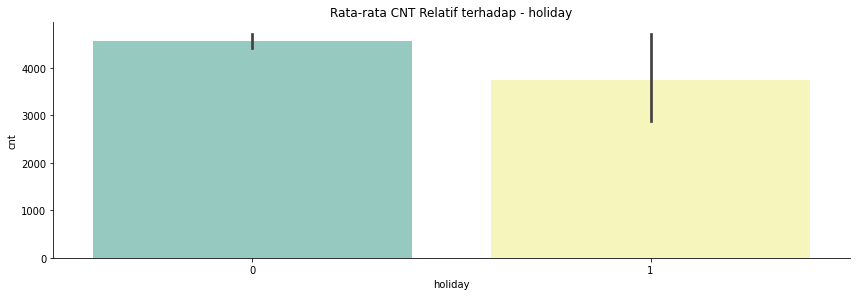

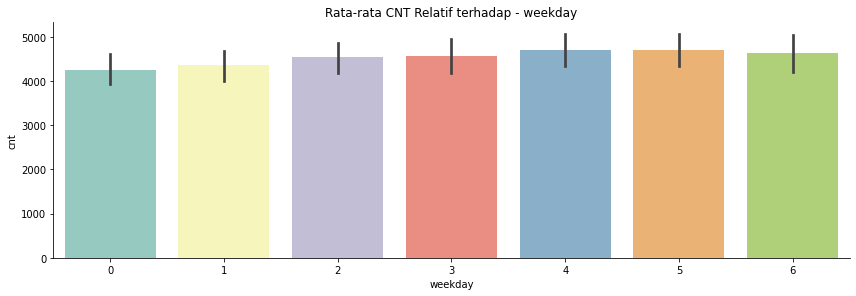

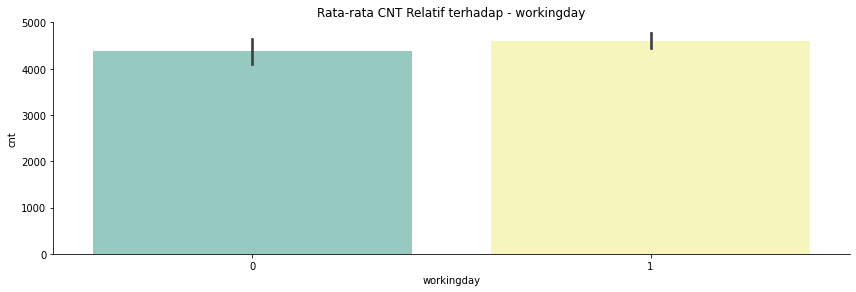

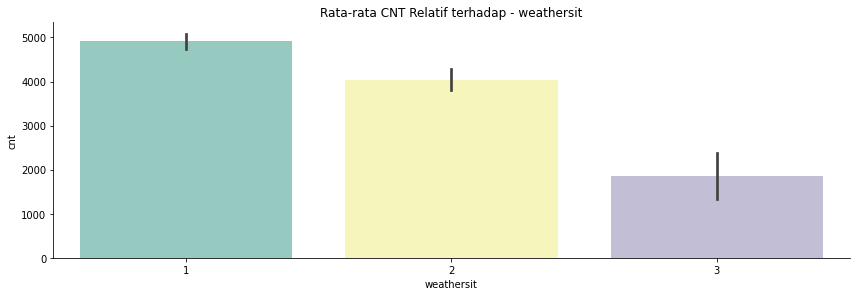

In [25]:
cat_features = bike_clean[categorical_features].columns.to_list()

for col in cat_features:
  sns.catplot(x = col, y ='cnt', kind='bar', dodge = False, height = 4, aspect = 3, data=bike_clean, palette="Set3")
  plt.title("Rata-rata CNT Relatif terhadap - {}".format(col))

Dengan mengamati rata-rata harga relatif terhadap fitur kategori di atas, kita memperoleh insight sebagai berikut:

- Pada fitur `season`, rata-rata jumlah bike yang disewa cenderung berbeda alias setiap kategori pada `season` cukup mempengaruhi `cnt`.
- Pada fitur `yr`, rata-rata jumlah bike yang disewa cenderung berbeda alias setiap kategori pada `yr` cukup mempengaruhi `cnt`.
- Pada fitur `month`, rata-rata jumlah bike yang disewa cenderung terdapat berbeda dan mirip alias ada beberapa bulan yang lebih berpengaruh dibandingkan bulan lainnya dan ada juga beberapa bulan yang tidak berpengaruh dibandingkan bulan lainnya.
- Pada fitur `holiday`, rata-rata jumlah bike yang disewa berbeda alias setiap kategori pada `holiday` cukup mempengaruhi `cnt`.
- Pada fitur `weekday`, rata-rata jumlah bike yang disewa cenderung mirip alias setiap kategori pada `weekday` kurang mempengaruhi `cnt`.
- Pada fitur `workingday`, rata-rata jumlah bike yang disewa cenderung mirip alias setiap kategori pada `workingday` kurang mempengaruhi `cnt`.
- Pada fitur `weathersit`, rata-rata jumlah bike yang disewa berbeda alias setiap kategori pada `weathersit` cukup mempengaruhi `cnt`.

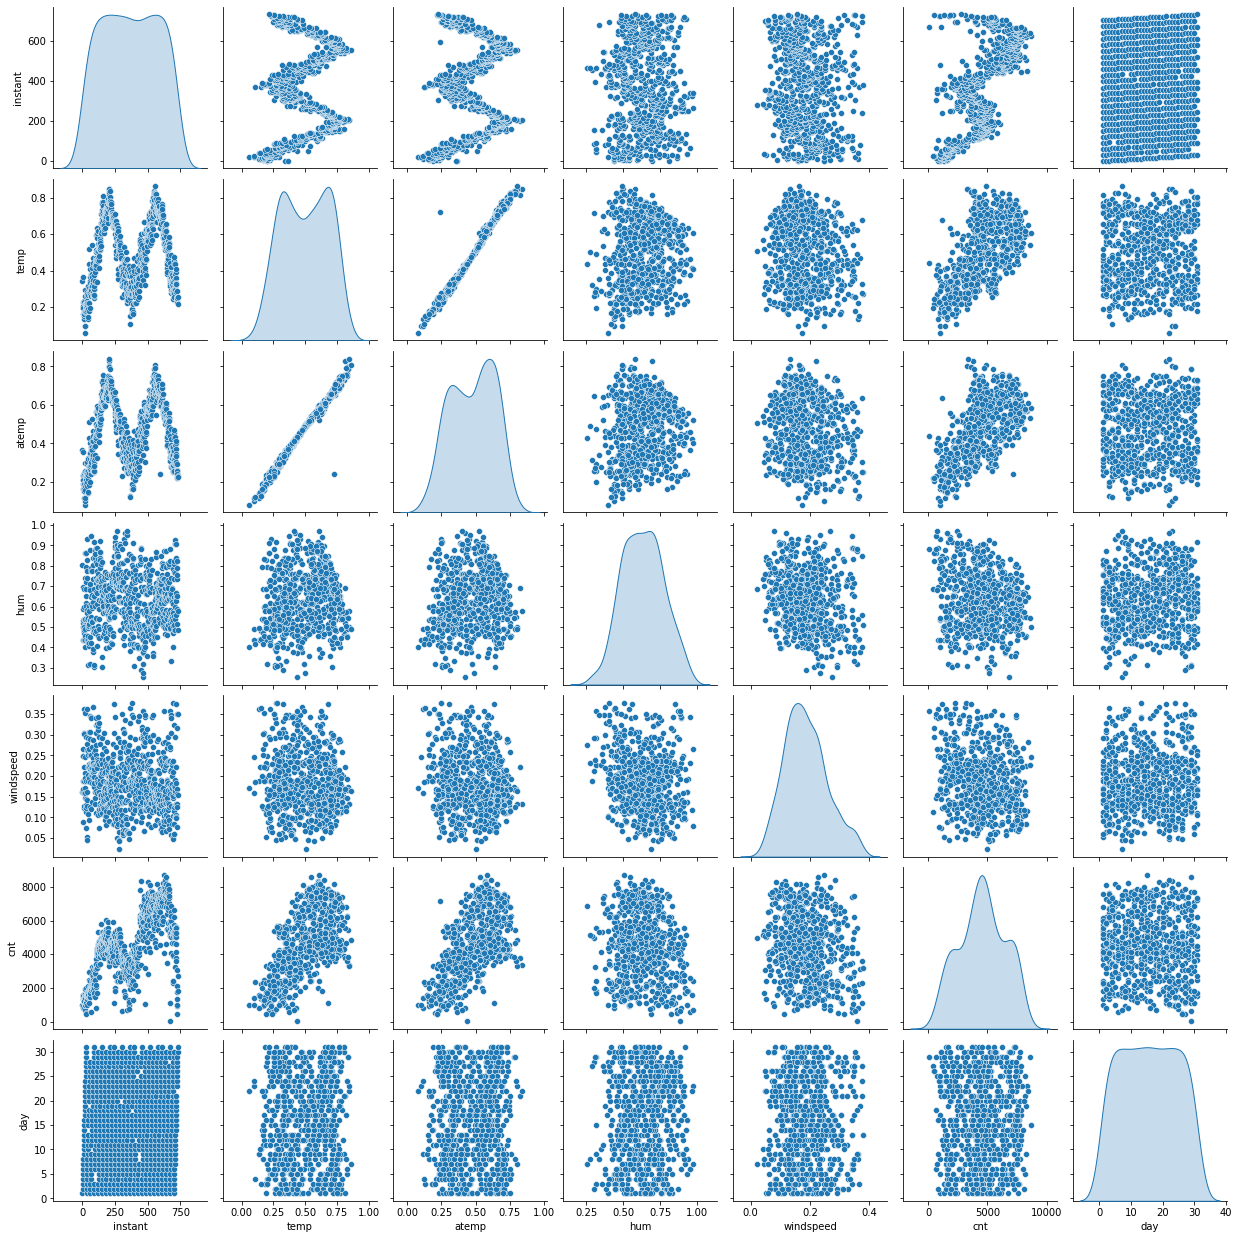

In [26]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(bike_clean[numerical_features], diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

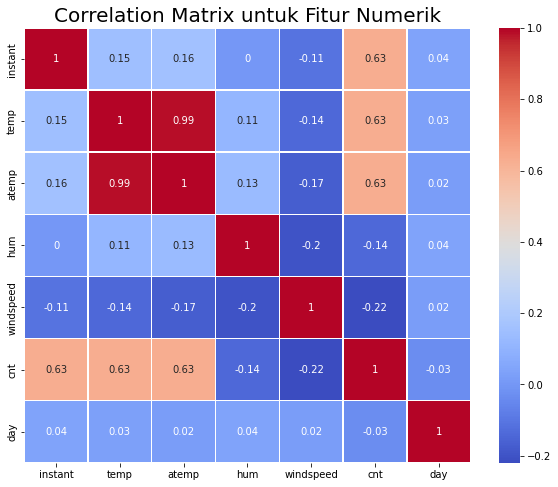

In [27]:
plt.figure(figsize=(10,8))
correlation_matrix = bike_clean.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot = True
sns.heatmap(data = correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik", size = 20)

Melalui Pairplot dan Correlation Matrix di atas dapat disimpulkan :

- Cenderung kolom `instant` berkorelasi kuat dengan kelas target (`cnt`) secara positif.
- Cenderung kolom `temp` berkorelasi kuat dengan kelas target (`cnt`) secara positif.
- Cenderung kolom `atemp` berkorelasi kuat dengan kelas target (`cnt`) secara positif.
- Cenderung kolom `hum` berkorelasi lemah dengan kelas target (`cnt`) secara negatif.
- Cenderung kolom `wind` berkorelasi sedang dengan kelas target (`cnt`) secara negatif.
- Cenderung kolom `day` berkorelasi lemah dengan kelas target (`cnt`) secara negatif.

# Data Preparation

## 1. Encoding Fitur Kategori
*One Hot Encoding* dilakukan dengan alasan cenderung model machine learning dapat lebih banyak untuk data bertipe numerik. Melalui tahap ini berguna untuk mendapatkan fitur baru yang sesuai sehingga dapat mewakili variabel kategori.

In [28]:
from sklearn.preprocessing import OneHotEncoder
bike_pre = bike_clean
bike_pre = pd.concat([bike_clean, pd.get_dummies(bike_clean['season'], prefix='season')], axis = 1)
bike_pre = pd.concat([bike_pre, pd.get_dummies(bike_pre['yr'], prefix='yr')], axis = 1)
bike_pre = pd.concat([bike_pre, pd.get_dummies(bike_pre['mnth'], prefix='mnth')], axis = 1)
bike_pre = pd.concat([bike_pre, pd.get_dummies(bike_pre['holiday'], prefix='holiday')], axis = 1)
bike_pre = pd.concat([bike_pre, pd.get_dummies(bike_pre['weekday'], prefix='weekday')], axis = 1)
bike_pre = pd.concat([bike_pre, pd.get_dummies(bike_pre['workingday'], prefix='workingday')], axis = 1)
bike_pre = pd.concat([bike_pre, pd.get_dummies(bike_pre['weathersit'], prefix='weathersit')], axis = 1)

bike_pre.drop(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'], axis = 1, inplace = True)
bike_pre.head()

,instant,temp,atemp,hum,windspeed,cnt,day,season_1,season_2,season_3,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,1,0.344167,0.363625,0.805833,0.160446,985,1,1,0,0,...,0,0,0,0,1,1,0,0,1,0
1,2,0.363478,0.353739,0.696087,0.248539,801,2,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,3,0.196364,0.189405,0.437273,0.248309,1349,3,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,4,0.200000,0.212122,0.590435,0.160296,1562,4,1,0,0,...,1,0,0,0,0,0,1,1,0,0
4,5,0.226957,0.229270,0.436957,0.186900,1600,5,1,0,0,...,0,1,0,0,0,0,1,1,0,0


## 2. Reduksi Dimensi dengan PCA

Teknik reduksi (pengurangan) dimensi adalah prosedur yang mengurangi jumlah fitur dengan tetap mempertahankan informasi pada data. Teknik pengurangan dimensi yang paling populer adalah Principal Component Analysis atau disingkat menjadi PCA. Alasan dilakukan tahap ini untuk meringkan beban komputasi dan menyederhanakan informasi yang dipelajari model.

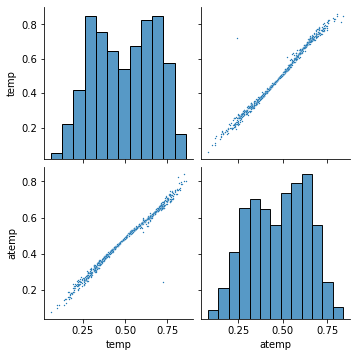

In [29]:
# Mengecek Ketiga Fitur Ukuran Diamonds

sns.pairplot(bike_pre[['temp','atemp']], plot_kws={"s":2})

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state = 123)
pca.fit(bike_pre[['temp','atemp']])
princ_comp = pca.transform(bike_pre[['temp','atemp']])

Nah, setelah menerapkan class PCA, kita bisa mengetahui proporsi informasi dari kedua komponen tadi.

In [31]:
pca.explained_variance_ratio_.round(2)

array([1., 0.])

Sekarang Anda akan membuat fitur baru bernama 'temperature' untuk menggantikan fitur 'temp' dan 'atemp' .

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=123)
pca.fit(bike_pre[['temp','atemp']])
bike_pre['temperature'] = pca.transform(bike_pre.loc[:, ('temp','atemp')]).flatten()
bike_pre.drop(['temp','atemp'], axis = 1, inplace = True)
bike_pre

,instant,hum,windspeed,cnt,day,season_1,season_2,season_3,season_4,yr_0,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,temperature
0,1,0.805833,0.160446,985,1,1,0,0,0,1,...,0,0,0,1,1,0,0,1,0,0.189338
1,2,0.696087,0.248539,801,2,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0.181460
2,3,0.437273,0.248309,1349,3,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0.415532
3,4,0.590435,0.160296,1562,4,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0.397732
4,5,0.436957,0.186900,1600,5,1,0,0,0,1,...,1,0,0,0,0,1,1,0,0,0.366188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,0.652917,0.350133,2114,27,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0.347583
727,728,0.590000,0.155471,3095,28,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0.329351
728,729,0.752917,0.124383,1341,29,1,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0.337746
729,730,0.483333,0.350754,1796,30,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0.342980


## 3. Train-Test-Split
Membagi dataset menjadi data latih (train) dan data uji (test) merupakan hal yang harus kita lakukan sebelum membuat model. Kita perlu mempertahankan sebagian data yang ada untuk menguji seberapa baik generalisasi model terhadap data baru. 


In [33]:
from sklearn.model_selection import train_test_split

X = bike_pre.drop(['cnt'], axis = 1)
y = bike_pre['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [34]:
print(f"Total # of sample in whole dataset: {len(X)}")
print(f"Total # of sample in train dataset: {len(X_train)}")
print(f"Total # of sample in test dataset: {len(X_test)}")

Total # of sample in whole dataset: 717
Total # of sample in train dataset: 573
Total # of sample in test dataset: 144


## 4. Standarisasi

Algoritma machine learning memiliki performa lebih baik dan konvergen lebih cepat ketika dimodelkan pada data dengan skala relatif sama atau mendekati distribusi normal. Proses scaling dan standarisasi membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma. 

Standardisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan. Untuk fitur numerik, kita tidak akan melakukan transformasi dengan one-hot-encoding seperti pada fitur kategori. Kita akan menggunakan teknik StandarScaler dari library Scikitlearn. 

> Untuk menghindari kebocoran informasi pada data uji, kita hanya akan menerapkan fitur standarisasi pada data latih. 

In [35]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['instant', 'hum', 'windspeed', 'temperature', 'day']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,instant,hum,windspeed,temperature,day
232,-0.625725,1.025315,0.843890,-1.194723,0.572328
156,-0.987810,-0.200695,-0.934390,-0.950986,-1.112316
465,0.484352,-1.390647,0.852595,0.254760,-0.663077
167,-0.935403,0.778908,-0.638150,-0.804301,0.123090
334,-0.139769,-0.744590,0.443035,1.015627,-1.673864


StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

In [36]:
X_train[numerical_features].describe().round(4)

,instant,hum,windspeed,temperature,day
count,573.0000,573.0000,573.0000,573.0000,573.0000
mean,0.0000,0.0000,-0.0000,-0.0000,-0.0000
std,1.0009,1.0009,1.0009,1.0009,1.0009
min,-1.7310,-2.6948,-2.0501,-2.0594,-1.6739
25%,-0.8735,-0.7536,-0.7337,-0.8570,-0.8877
50%,-0.0016,-0.0294,-0.0889,-0.0558,0.0108
75%,0.8560,0.7308,0.6260,0.8725,0.9093
max,1.7469,2.4707,2.6572,2.3977,1.6954


# Model Development

Mari siapkan data frame untuk analisis ketiga model tersebut lebih dahulu.



In [37]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index = ['train_mse', "test_mse"],
                      columns=['KNN', 'RandomForest', 'Boosting'])

## 1. Model Development dengan K-Nearest Neighbor (KNN)
KNN adalah algoritma yang relatif sederhana dibandingkan dengan algoritma lain. Algoritma KNN menggunakan ‘kesamaan fitur’ untuk memprediksi nilai dari setiap data yang baru. Dengan kata lain, setiap data baru diberi nilai berdasarkan seberapa mirip titik tersebut dalam set pelatihan.

In [64]:
# Memanggil Libraries Model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Menentukan parameter k (jumlah data terdekat)
knn = KNeighborsRegressor(n_neighbors = 20)
knn.fit(X_train, y_train)

# Menghasilkan performa train
models.loc['train_mse', 'KNN'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## 2. Model Development dengan Random Forest (Bagging Algorithm)

Random forest merupakan salah satu model machine learning yang termasuk ke dalam kategori ensemble (group) learning. Apa itu model ensemble? Sederhananya, ia merupakan model prediksi yang terdiri dari beberapa model dan bekerja secara bersama-sama. 

In [60]:
# Import library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=40, max_depth=8, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Parameter yang digunakan :

- `n_estimator`: jumlah trees (pohon) di forest. Di sini kita set `n_estimator=40`.
- `max_depth`: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan. Di sini kita set `max_depth=8`.
- `random_state`: digunakan untuk mengontrol random number generator yang digunakan. Di sini kita set `random_state=55`.
- `n_jobs`: jumlah job (pekerjaan) yang digunakan secara paralel. Ia merupakan komponen untuk mengontrol thread atau proses yang berjalan secara paralel. `n_jobs=-1` artinya semua proses berjalan secara paralel.

## 3. Model Development dengan Boosting Algorithm

Algoritma yang menggunakan teknik boosting bekerja dengan membangun model dari data latih. Kemudian ia membuat model kedua yang bertugas memperbaiki kesalahan dari model pertama. Model ditambahkan sampai data latih terprediksi dengan baik atau telah mencapai jumlah maksimum model untuk ditambahkan. 

In [69]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate = 0.0001, random_state = 55)
boosting.fit(X_train, y_train)
models.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred = boosting.predict(X_train), y_true = y_train)

Menentukan parameter :

- `learning_rate`: bobot yang diterapkan pada setiap regressor di masing-masing proses iterasi boosting. Diisi dengan `learning_rate = 0.05`.
- `random_state`: digunakan untuk mengontrol random number generator yang digunakan. Diisi dengan `random_state = 55`.

# Evaluasi Model

Mengevaluasi model regresi sebenarnya relatif sederhana. Secara umum, hampir semua metrik adalah sama. Jika prediksi mendekati nilai sebenarnya, performanya baik. Sedangkan jika tidak, performanya buruk. 

In [42]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

Metrik yang akan kita gunakan pada prediksi ini adalah MSE atau Mean Squared Error yang menghitung jumlah selisih kuadrat rata-rata nilai sebenarnya dengan nilai prediksi.

In [70]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index = ['KNN', 'RF', 'Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
  mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

,train,test
KNN,585.704388,645.181687
RF,116.289618,441.565122
Boosting,705.481594,763.99904


Untuk memudahkan, mari kita plot metrik tersebut dengan bar chart. Implementasikan kode di bawah ini:

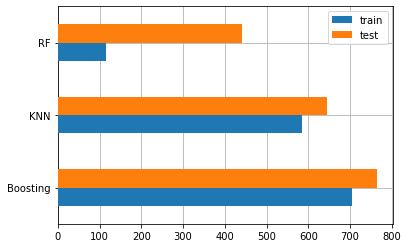

In [71]:
# Memplot Hasil Metric
fig, ax = plt.subplots()
mse.sort_values(by="test", ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Untuk mengujinya, mari kita buat prediksi menggunakan beberapa harga dari data test.

In [73]:
prediksi = X_test.iloc[0:5].copy()
pred_dict = {'y_true': y_test[0:5]}

for name, model in model_dict.items():
  pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
226,4338,4456.8,4491.9,4390.1
430,3956,4388.6,3387.0,3252.2
649,7570,6532.6,7019.5,6813.6
653,5875,5570.9,7074.7,6942.2
342,3620,3811.6,3418.2,3213.1


## Conclusion
Pada projek ini kita telah melalui berbagai tahapan mulai dari memahami Domain proyek, kemudian memahami kasus bisnis yang ingin diselesaikan, lalu mencoba mengerti data yang ada, menyiapkan dataset, modeling hingga evaluasi. Kita juga telah berhasil menyelesaikan masalah bisnis dan mencapai tujuan yang ada melalui pembangunan 3 model kemudian memilih satu model terbaik sebagai solusi masalah kita yaitu model **Random Forest**. Harapannya melalui projek ini dapat memberikan manfaat bagi penulis dan pembaca secara luas. Sekian terima kasih telah membaca projek ini.